In [5]:
pip install textblob

  Using cached textblob-0.17.1-py2.py3-none-any.whl (636 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pickle
import pandas as pd
data=pd.read_pickle('corpus_prince.pkl')
data

,transcript
louis,introfade the music out lets roll hold there l...
dave,this is dave he tells dirty jokes for a living...
ricky,hello hello how you doing great thank you wow ...
Jim-G,thank you thank you oh my gosh thank you so mu...
bill,all right thank you thank you very much thank...
Jim-J,ladies and gentlemen please welcome to the ...
john,armed with boyish charm and a sharp wit the fo...
George,recorded on january – state theatre new bruns...
ali,ladies and gentlemen please welcome to the sta...
anthony,thank you thank you thank you san francisco th...


In [6]:
from textblob import TextBlob
f1 = lambda x: TextBlob(x).sentiment.polarity
data['polarity']=data['transcript'].apply(f1)

In [7]:
f2 = lambda x: TextBlob(x).sentiment.subjectivity
data['subjectivity']=data['transcript'].apply(f2)
data

,transcript,polarity,subjectivity
louis,introfade the music out lets roll hold there l...,0.052783,0.522390
dave,this is dave he tells dirty jokes for a living...,-0.002739,0.515717
ricky,hello hello how you doing great thank you wow ...,0.052760,0.507791
Jim-G,thank you thank you oh my gosh thank you so mu...,0.085554,0.528859
bill,all right thank you thank you very much thank...,0.008194,0.543606
Jim-J,ladies and gentlemen please welcome to the ...,0.039077,0.537468
john,armed with boyish charm and a sharp wit the fo...,0.075205,0.489270
George,recorded on january – state theatre new bruns...,0.033390,0.515514
ali,ladies and gentlemen please welcome to the sta...,0.067868,0.478434
anthony,thank you thank you thank you san francisco th...,0.048225,0.562653


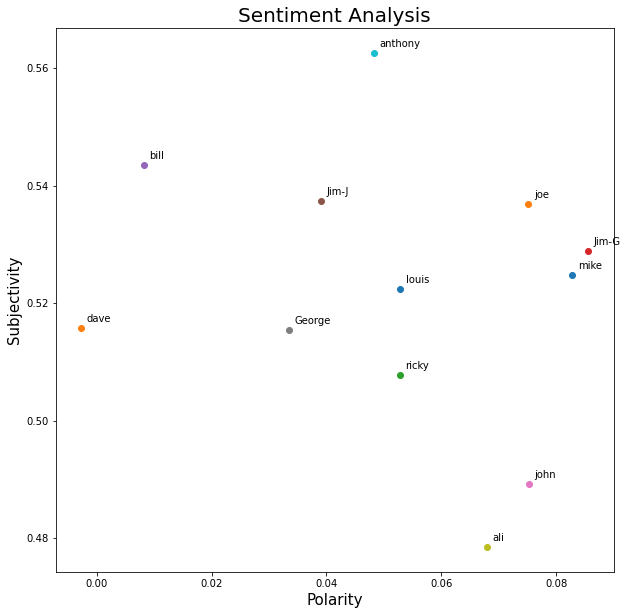

In [8]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)
for i,com in enumerate(data.index):
  x_axis=data.polarity.loc[com]
  y_axis=data.subjectivity.loc[com]
  plt.scatter(x_axis,y_axis)
  plt.text(x_axis+.001, y_axis+.001, com, fontsize=10)

plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('Polarity', fontsize=15)
plt.ylabel('Subjectivity', fontsize=15)
plt.show()

In [9]:
import numpy as np
import math

def split_text(text, n=10):
    length = len(text)
    size = math.floor(length / n) 
    start = np.arange(0, length, size)
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [10]:
dp=[]
for i in data.transcript:
  asa = split_text(i)
  dp.append(asa)
dp

[['introfade the music out lets roll hold there lights do the lights thank you thank you very much i appreciate that i dont necessarily agree with you but i appreciate very much well this is a nice place this is easily the nicest place for many miles in every direction thats how you compliment a building and shit on a town with one sentence it is odd around here as i was driving here there doesnt seem to be any difference between the sidewalk and the street for pedestrians here people just kind of walk in the middle of the road i love traveling and seeing all the different parts of the country i live in new york i live in a– theres no value to your doing that at all the old lady and the dogi live– i live in new york i always– like theres this old lady in my neighborhood and shes always walking her dog shes always just– shes very old she just stands there just being old and the dog just fights gravity every day just– the two of them its really– the dogs got a cloudy eye and shes got a c

In [11]:
trans = []
for x in dp:
    piece = []
    for p in x:
        piece.append(TextBlob(p).sentiment.polarity)
    trans.append(piece)
    
trans

[[0.06517288267288265,
  0.03804510440539852,
  0.10302813348267889,
  -0.004500230043708317,
  0.09207656926406924,
  0.00917292874840044,
  0.12516960651289008,
  0.10825285043594902,
  0.012366755108690604,
  -0.021817460317460305],
 [-0.05073496534764142,
  -0.07116775866775868,
  0.06195413201031179,
  0.04387865535824718,
  -0.0166374883286648,
  0.09280719897386562,
  -0.12111699000587887,
  -0.09576397087760725,
  -0.04705612674362674,
  0.19218104222821206],
 [0.14262327178993844,
  0.15681686199978884,
  0.011247749300846639,
  -0.019495576886881253,
  0.12988109385168206,
  -0.00865552643075582,
  0.053953368637834634,
  0.028086321988761,
  -0.017598993002218812,
  0.07939170617742046],
 [0.07277585377585377,
  0.06919859307359309,
  0.08343413610654991,
  0.11456736353077814,
  0.15042283298097248,
  0.06688661670004951,
  0.17283395486708736,
  0.056163916947250266,
  0.03492140795712224,
  0.023560495626822154],
 [-0.027817143174286022,
  -0.007264331047516883,
  0.01558

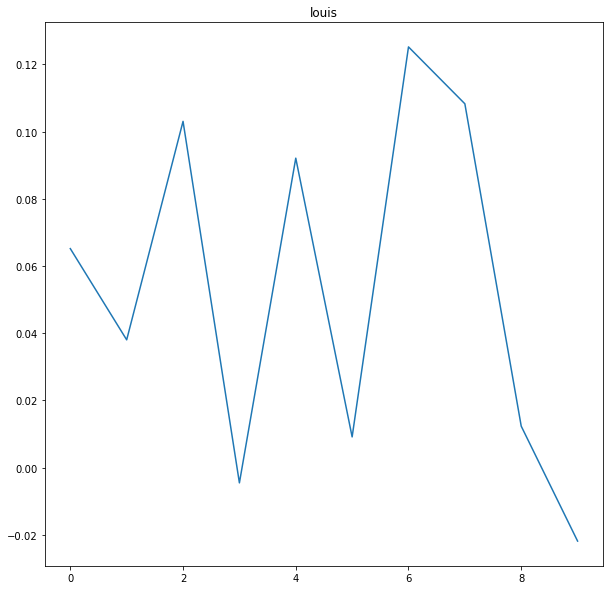

In [12]:
plt.plot(trans[0])
plt.title(data.index[0])
plt.show()

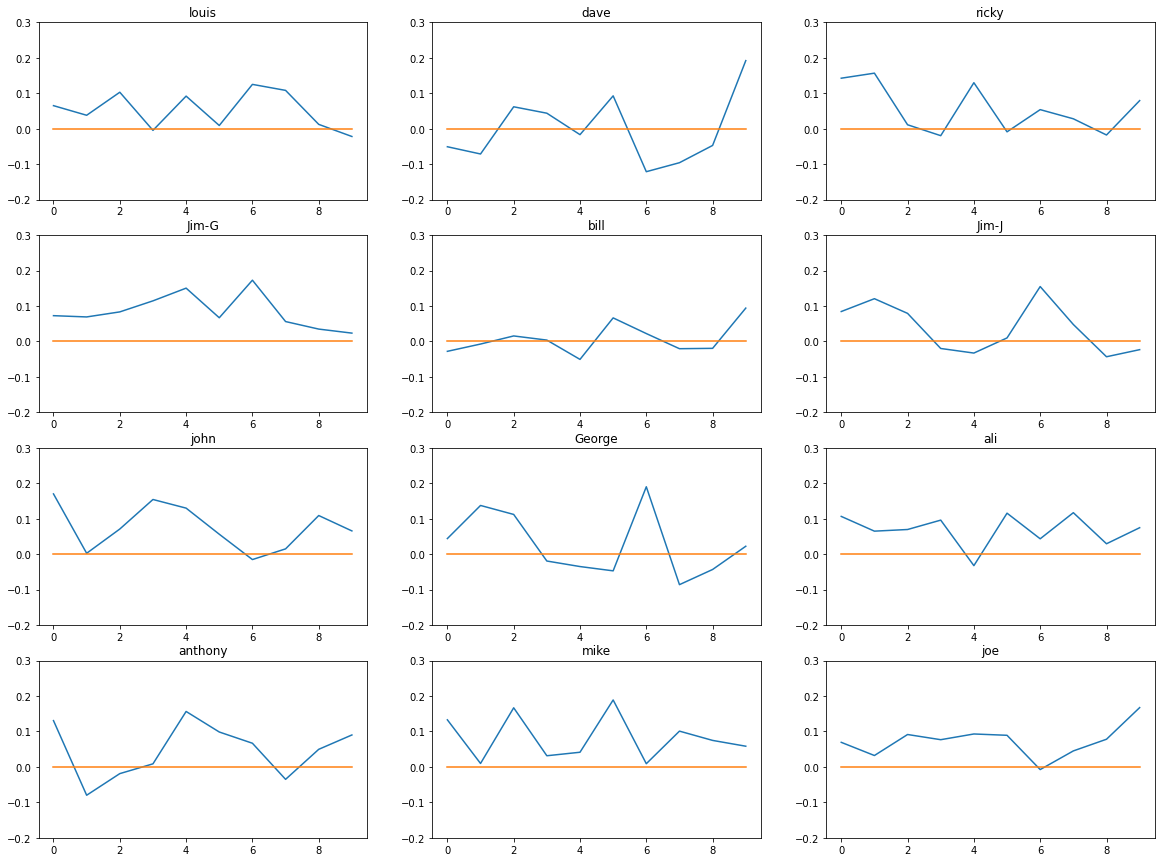

In [13]:
import numpy as np
plt.rcParams['figure.figsize'] = [20, 15]
for ind, com in enumerate(data.index):    
    plt.subplot(4, 3, ind+1)
    plt.plot(trans[ind])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(com)
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()